In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
import os
import pickle


In [5]:
data = pd.read_csv('mfcc13_df.csv', index_col=False)
labels = data.iloc[:,[-1]]
data.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
count,4720.000000,4720.000000,4720.000000,4720.000000,4720.000000,4720.000000,4720.000000,4720.000000,4720.000000,4720.000000,4720.000000,4720.000000,4720.000000,4720.000000
mean,-462.617816,61.536074,3.708428,11.499180,-1.297713,-0.793502,-8.212944,-7.707062,-8.820947,-1.480588,-8.478234,0.551877,-4.249241,3.326271
std,119.858131,26.597890,16.164749,14.983950,11.067730,7.374472,6.957445,7.161275,6.436707,5.235146,6.326577,6.379453,4.663620,2.905503
min,-848.919070,-5.006873,-56.336224,-36.125170,-43.675873,-26.159702,-35.133877,-31.534748,-28.178675,-23.421574,-25.376469,-16.693745,-22.271100,0.000000
25%,-538.269513,42.500910,-8.392062,1.219817,-8.319850,-5.924450,-12.594921,-12.975156,-13.790841,-4.657176,-13.029393,-4.346815,-6.977400,0.000000
50%,-435.310965,59.710182,2.328990,10.467834,-0.981610,-0.995004,-7.974021,-7.563070,-8.736546,-1.385920,-8.761838,-0.196650,-3.930869,3.000000
75%,-378.401825,77.381369,16.122299,21.186294,6.173053,4.184135,-3.419299,-2.176422,-4.174962,2.008315,-3.741979,4.933820,-1.214083,6.000000
max,-196.677430,163.169360,47.717460,63.043330,30.989618,20.580652,13.158043,10.234292,10.641557,24.572657,13.467502,20.122078,18.313444,8.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4720 entries, 0 to 4719
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       4720 non-null   float64
 1   1       4720 non-null   float64
 2   2       4720 non-null   float64
 3   3       4720 non-null   float64
 4   4       4720 non-null   float64
 5   5       4720 non-null   float64
 6   6       4720 non-null   float64
 7   7       4720 non-null   float64
 8   8       4720 non-null   float64
 9   9       4720 non-null   float64
 10  10      4720 non-null   float64
 11  11      4720 non-null   float64
 12  12      4720 non-null   float64
 13  13      4720 non-null   int64  
dtypes: float64(13), int64(1)
memory usage: 516.4 KB


In [7]:
data.isnull().sum()


0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
dtype: int64

In [8]:
data.isna().sum()
data.loc[0][:]

0    -697.984200
1      55.228490
2       0.323863
3      12.775377
4       7.396148
5       0.866224
6      -3.550276
7      -2.828331
8     -11.305533
9      -2.524927
10      0.496104
11     -2.722926
12      1.645800
13      0.000000
Name: 0, dtype: float64

##Outliers


In [9]:
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
print(IQR)
print(data.any() < (Q1 - 1.5*IQR)) and (data.any() > (Q3 + 1.5*IQR))
#from scipy import stats
#data=data[(np.abs(stats.zscore(data)) < 3).all(axis=1)]
data = data.drop(labels.columns,axis = 1) # dropping labels column

0     159.867687
1      34.880459
2      24.514361
3      19.966477
4      14.492903
5      10.108586
6       9.175622
7      10.798735
8       9.615879
9       6.665491
10      9.287414
11      9.280635
12      5.763317
13      6.000000
dtype: float64
0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
dtype: bool


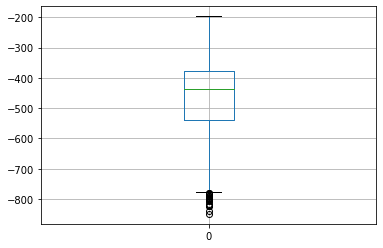

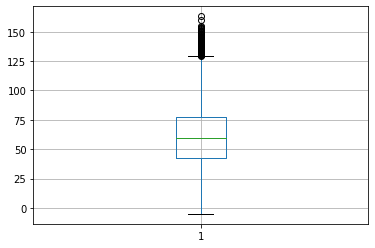

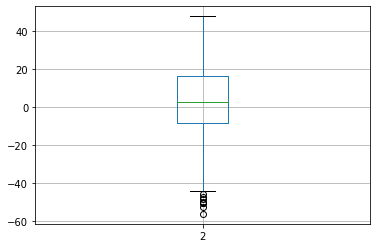

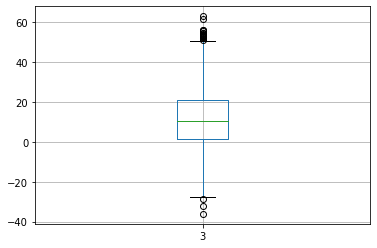

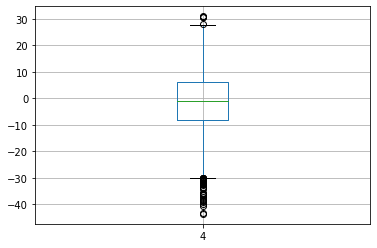

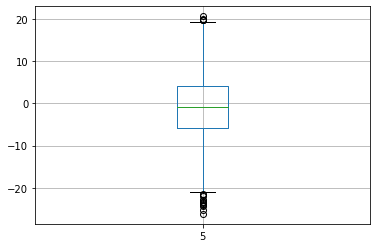

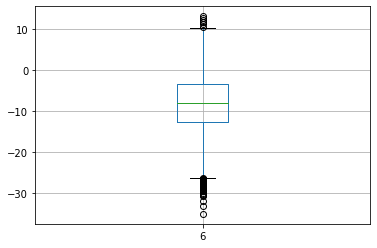

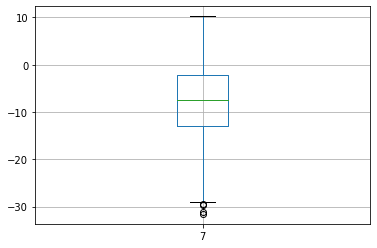

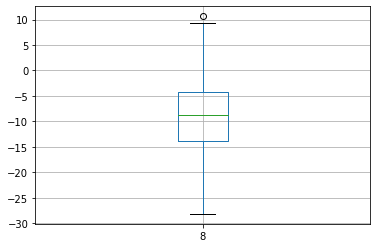

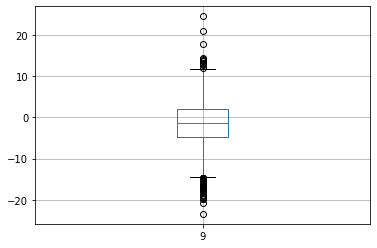

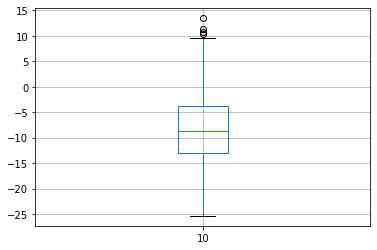

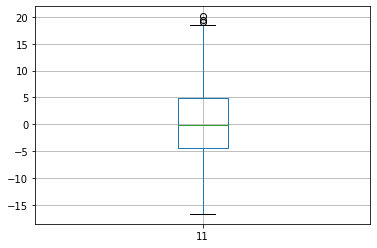

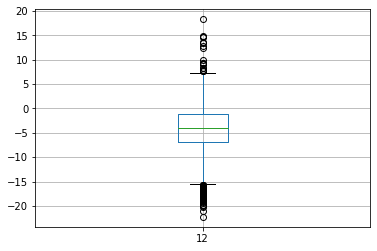

In [10]:
for column in data:
    plt.figure()
    data.boxplot([column])

##Standarization

In [11]:
data +=848.919070
x = data.values
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
data = pd.DataFrame(x_scaled)

In [12]:
data.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,4720.000000,4720.000000,4720.000000,4720.000000,4720.000000,4720.000000,4720.000000,4720.000000,4720.000000,4720.000000,4720.000000,4720.000000,4720.000000
mean,0.592267,0.395674,0.577055,0.480237,0.567574,0.542704,0.557462,0.570463,0.498651,0.457159,0.435029,0.468430,0.444057
std,0.183763,0.158155,0.155350,0.151096,0.148231,0.157775,0.144071,0.171449,0.165808,0.109079,0.162872,0.173280,0.114911
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.476280,0.282488,0.460764,0.376581,0.473526,0.432929,0.466723,0.444338,0.370627,0.390972,0.317863,0.335370,0.376836
50%,0.634133,0.384817,0.563798,0.469837,0.571807,0.538393,0.562410,0.573910,0.500825,0.459131,0.427727,0.448098,0.451902
75%,0.721385,0.489892,0.696357,0.577920,0.667630,0.649200,0.656726,0.702873,0.618330,0.529853,0.556959,0.587453,0.518843
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


##Splitting data


In [13]:
 X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.3, random_state=50)

print("Number of training samples:", X_train.shape[0])

print("Number of testing samples:", X_test.shape[0])

print("Number of features:", X_train.shape[1])


Number of training samples: 3304
Number of testing samples: 1416
Number of features: 13


## Grid Search - finding best combination of hyperparameters

In [14]:
model = MLPClassifier()

parameter_space = {
    'hidden_layer_sizes': [(200,),(300,)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.01, 0.1],
    'learning_rate': ['constant','adaptive'],
    'max_iter': [200, 500],
    'batch_size': [100, 254]
    
}

clf = GridSearchCV(model, parameter_space, n_jobs=-1, cv=5)
clf.fit(X_train, y_train) 


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:934: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GridSearchCV(cv=5, error_score=nan,
             estimator=MLPClassifier(activation='relu', alpha=0.0001,
                                     batch_size='auto', beta_1=0.9,
                                     beta_2=0.999, early_stopping=False,
                                     epsilon=1e-08, hidden_layer_sizes=(100,),
                                     learning_rate='constant',
                                     learning_rate_init=0.001, max_fun=15000,
                                     max_iter=200, momentum=0.9,
                                     n_iter_no_change=10,
                                     nesterovs_momentum=True, power_t=0.5,
                                     random_state...
                                     validation_fraction=0.1, verbose=False,
                                     warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'activation': ['tanh', 'relu'], 'alpha': [0.01, 0.1],
                         'ba

In [15]:
print('Best parameters found:\n', clf.best_params_)

Best parameters found:
 {'activation': 'relu', 'alpha': 0.01, 'batch_size': 100, 'hidden_layer_sizes': (300,), 'learning_rate': 'adaptive', 'max_iter': 500, 'solver': 'adam'}


In [16]:
model_params = {
    'activation': 'tanh',
    'alpha': 0.01,
    'batch_size': 254,
    'hidden_layer_sizes': (300,),
    'learning_rate': 'adaptive',
    'max_iter': 200,
    'solver': 'adam'
}

means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))

0.705 (+/-0.032) for {'activation': 'tanh', 'alpha': 0.01, 'batch_size': 100, 'hidden_layer_sizes': (200,), 'learning_rate': 'constant', 'max_iter': 200, 'solver': 'sgd'}
0.770 (+/-0.020) for {'activation': 'tanh', 'alpha': 0.01, 'batch_size': 100, 'hidden_layer_sizes': (200,), 'learning_rate': 'constant', 'max_iter': 200, 'solver': 'adam'}
0.742 (+/-0.032) for {'activation': 'tanh', 'alpha': 0.01, 'batch_size': 100, 'hidden_layer_sizes': (200,), 'learning_rate': 'constant', 'max_iter': 500, 'solver': 'sgd'}
0.805 (+/-0.040) for {'activation': 'tanh', 'alpha': 0.01, 'batch_size': 100, 'hidden_layer_sizes': (200,), 'learning_rate': 'constant', 'max_iter': 500, 'solver': 'adam'}
0.701 (+/-0.019) for {'activation': 'tanh', 'alpha': 0.01, 'batch_size': 100, 'hidden_layer_sizes': (200,), 'learning_rate': 'adaptive', 'max_iter': 200, 'solver': 'sgd'}
0.775 (+/-0.030) for {'activation': 'tanh', 'alpha': 0.01, 'batch_size': 100, 'hidden_layer_sizes': (200,), 'learning_rate': 'adaptive', 'max_i

In [17]:
#model = MLPClassifier(**model_paramss)
#model.fit(X_p_train, y_p_train)

y_true, y_pred = y_test, clf.predict(X_test)

accuracy = accuracy_score(y_true, y_pred)

print("Accuracy: {:.2f}%".format(accuracy*100))

Accuracy: 90.25%


In [18]:
print('Results on the test set:')
print(classification_report(y_true, y_pred))
confusion_matrix(y_true, y_pred)

Results on the test set:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       413
           1       0.86      0.94      0.90       160
           3       0.73      0.89      0.80       146
           4       0.92      0.87      0.89       122
           5       0.91      0.88      0.90       152
           6       0.87      0.84      0.86       132
           7       0.92      0.86      0.89       151
           8       0.87      0.74      0.80       140

    accuracy                           0.90      1416
   macro avg       0.89      0.88      0.88      1416
weighted avg       0.91      0.90      0.90      1416



array([[413,   0,   0,   0,   0,   0,   0,   0],
       [  0, 150,   0,   7,   0,   0,   3,   0],
       [  1,   0, 130,   0,   6,   2,   1,   6],
       [  0,  11,   0, 106,   0,   0,   4,   1],
       [  0,   2,   7,   0, 134,   5,   1,   3],
       [  0,   1,  15,   0,   1, 111,   0,   4],
       [  0,  11,   3,   2,   1,   3, 130,   1],
       [  0,   0,  23,   0,   5,   6,   2, 104]])

## Saving model

In [19]:
if not os.path.isdir("result"):
    os.mkdir("result")

pickle.dump(clf, open("result/mlp_classifier.model", "wb"))
